In [1]:
from fenics import *
import matplotlib.pyplot as plt

In [21]:
# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'Lagrange', 2)

In [22]:
# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

TOL = 1E-12
def boundary_D(x, on_boundary):
    if on_boundary:
        if near(x[0], 0, TOL) or near(x[0], 1, TOL):
            return True
        else:
            return False
    else:
        return False
    
bc = DirichletBC(V, u_D, boundary_D)

In [23]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx

# The linear form must include the Neunmann boundary condition
g = Expression('4*x[1]', degree=1)
L = f*v*dx + g*v*ds

In [24]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


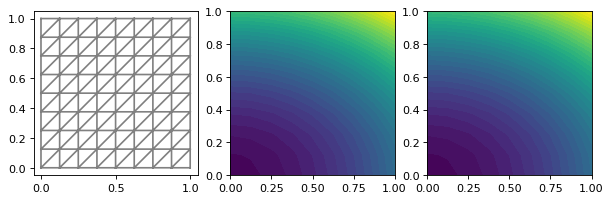

In [25]:
# Plot solution and mesh
plt.figure(figsize=(9, 5), dpi=80)
plt.subplot(1,3,1)
plot(mesh)
plt.subplot(1,3,2)
plot(u)
plt.subplot(1,3,3)
plot(interpolate(u_D, V))

# Save solution to file in VTK format
# vtkfile = File('poisson/solution.pvd')
# vtkfile << u

In [26]:
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [27]:
# Compute maximum error at verticies
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)

In [28]:
import numpy as np
error_max = np.max(np.abs(vertex_values_u - vertex_values_u_D))
print('u_exact = ', vertex_values_u_D)
print('u_fem = ', vertex_values_u)

u_exact =  [ 1.        1.015625  1.0625    1.140625  1.25      1.390625  1.5625
  1.765625  2.        1.03125   1.046875  1.09375   1.171875  1.28125
  1.421875  1.59375   1.796875  2.03125   1.125     1.140625  1.1875
  1.265625  1.375     1.515625  1.6875    1.890625  2.125     1.28125
  1.296875  1.34375   1.421875  1.53125   1.671875  1.84375   2.046875
  2.28125   1.5       1.515625  1.5625    1.640625  1.75      1.890625
  2.0625    2.265625  2.5       1.78125   1.796875  1.84375   1.921875
  2.03125   2.171875  2.34375   2.546875  2.78125   2.125     2.140625
  2.1875    2.265625  2.375     2.515625  2.6875    2.890625  3.125
  2.53125   2.546875  2.59375   2.671875  2.78125   2.921875  3.09375
  3.296875  3.53125   3.        3.015625  3.0625    3.140625  3.25
  3.390625  3.5625    3.765625  4.      ]
u_fem =  [ 1.        1.015625  1.0625    1.140625  1.25      1.390625  1.5625
  1.765625  2.        1.03125   1.046875  1.09375   1.171875  1.28125
  1.421875  1.59375   1.796875  

In [29]:
# Print errors
print('error L2 = ', error_L2)
print('error_max = ', error_max)

error L2 =  7.664459055405571e-14
error_max =  1.33226762955e-13
